# Basic Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/raw_house_data - raw_house_data.csv')

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

# Handling missing values

In [ ]:
df = df.dropna()

In [ ]:
f = [c for c in df.columns if c not in ['kitchen_features','floor_covering']]
df[f] = df[f].fillna(0)

<ipython-input-182-b7d5d6db2f4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f] = df[f].fillna(0)


In [ ]:
df['kitchen_features'] = df['kitchen_features'].fillna('Others')
df['floor_covering'] = df['floor_covering'].fillna('Others')

<ipython-input-183-b8efd884b239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_features'] = df['kitchen_features'].fillna('Others')
<ipython-input-183-b8efd884b239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_covering'] = df['floor_covering'].fillna('Others')


# Converting data types

In [ ]:
df['sqrt_ft']=df['sqrt_ft'].astype('int')
df['sold_price']=df['sold_price'].astype('int')
df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')

#Dropping duplicates if any

In [ ]:
df.drop_duplicates(inplace=True)

#Feature Engineering

## Calculating total rooms and dropping individual rooms later

In [ ]:
df['total_rooms'] = df['bathrooms']+df['bedrooms']

In [ ]:
df = df.drop(['bedrooms', 'bathrooms'],axis=1)

## Finding price per square feet

In [ ]:
df['price_per_sqrtft'] = df['sold_price']/df['sqrt_ft']
df['price_per_sqrtft'] = pd.to_numeric(df['price_per_sqrtft'], errors='coerce')

In [ ]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,total_rooms,price_per_sqrtft
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,23.0,504.761905
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,4.0,575.342466
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,6396,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,10.0,533.372420
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,6842,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,7.0,475.007308
6,21610478,2400000,85712,-110.883315,32.261069,2.10,19038.42,2001,12025,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.0,17.0,199.584200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000,85739,-110.859829,32.546570,0.29,4184.40,2006,2681,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",180.0,5.0,199.179411
4989,21902512,545000,85745,-111.061493,32.306472,1.19,6326.96,2007,3720,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,Ceramic Tile,12.0,7.0,146.505376
4993,21908358,565000,85750,-110.820216,32.307646,0.83,4568.71,1986,2813,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2.0,"Carpet, Mexican Tile",6.0,7.0,200.853182
4994,21909379,535000,85718,-110.922291,32.317496,0.18,4414.00,2002,2106,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,Ceramic Tile,198.0,5.0,254.036087


#Handling inf values

In [ ]:
pd.set_option('mode.use_inf_as_na', True)

<ipython-input-190-c240f4aa3757>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [ ]:
df['price_per_sqrtft'] = df['price_per_sqrtft'].replace(np.nan,0)

#Binning based on k=20

In [ ]:
df["bins"] = pd.qcut(df["price_per_sqrtft"], q=20, labels=False)

In [ ]:
df.to_csv('housing_clean_dataset.csv')

# Corelation heatmap between important features

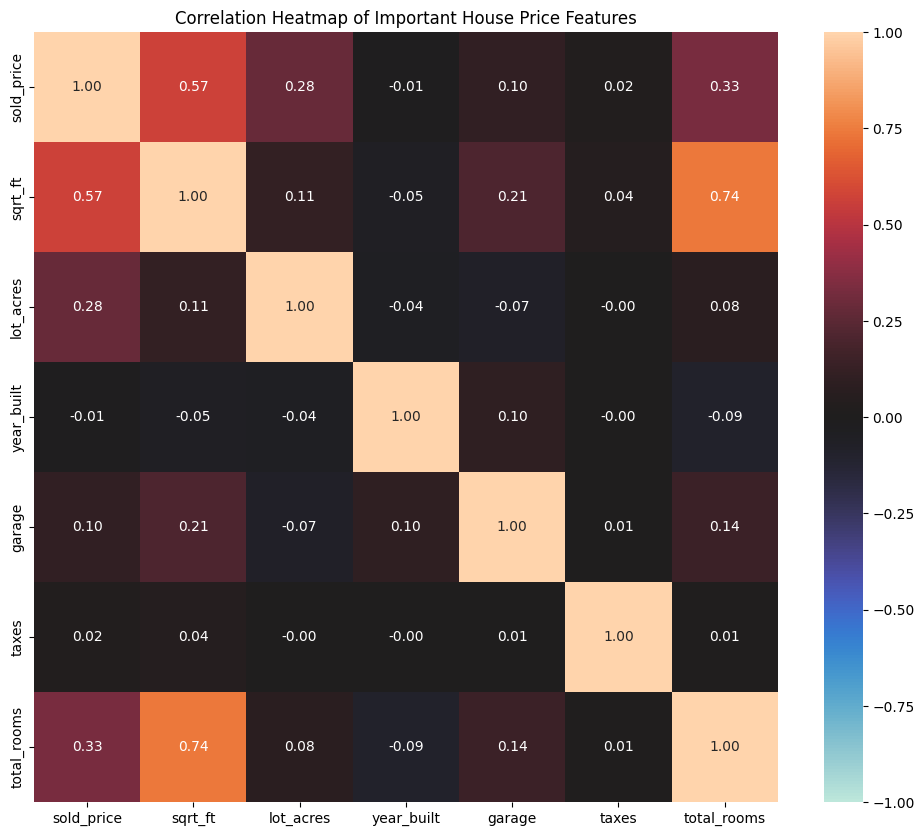

In [ ]:
# Create correlation heatmap
important_features = ['sold_price', 'sqrt_ft', 'lot_acres', 'year_built', 'garage', 'taxes', 'total_rooms']

# Create a correlation matrix for the important features
corr_matrix = df[important_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Important House Price Features')
plt.show()

In [ ]:
new_df=df[['longitude', 'latitude', 'bins']]

In [ ]:
new_df

,longitude,latitude,bins
0,-110.378200,31.356362,19
1,-111.045371,31.594213,19
4,-110.813768,32.285162,19
5,-110.910593,32.339090,19
6,-110.883315,32.261069,9
...,...,...,...
4988,-110.859829,32.546570,9
4989,-111.061493,32.306472,1
4993,-110.820216,32.307646,9
4994,-110.922291,32.317496,16


#Slicing the full dataset into training data and testing data

In [ ]:
ninety_pct = 0.9*new_df.shape[0]

X_train = new_df.loc[:ninety_pct-1, :]
X_test = new_df.loc[ninety_pct:, :]

X_train.shape, X_test.shape

((3457, 3), (913, 3))

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
y_train = X_train[:,2]

In [ ]:
y_train

array([19., 19., 19., ...,  0., 13., 13.])

In [ ]:
X_train = X_train[:,:2]

In [ ]:
X_train

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-110.813768,   32.285162],
       ...,
       [-110.883238,   32.323465],
       [-111.054993,   32.417093],
       [-110.868639,   32.328159]])

# Min Max Scaling

In [ ]:
X_train = X_train - X_train.min() / (X_train.max() - X_train.min())

# Steps to be done with testing dataset

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
y_test = X_test[:,2]

In [ ]:
X_test = X_test[:,:2]

In [ ]:
y_test

array([ 6., 14.,  7.,  6.,  5.,  4., 12.,  5.,  3.,  1.,  1.,  2.,  8.,
        7.,  9.,  2., 18.,  7.,  5.,  6.,  6., 17.,  9., 10.,  2.,  1.,
        5., 13., 14.,  1., 11.,  5.,  1., 10.,  2.,  9.,  8., 17., 16.,
        9., 13.,  2., 11., 13.,  4.,  3.,  4.,  0., 12., 16.,  6.,  2.,
       11.,  1.,  5., 12., 12.,  3.,  2.,  0.,  7.,  3.,  9., 10.,  1.,
        7., 10.,  0.,  3., 10., 19., 11.,  2.,  9.,  8., 10.,  1., 14.,
        0.,  0.,  3.,  2.,  1.,  5.,  2.,  2., 13.,  1.,  7., 14., 12.,
        4.,  4.,  7.,  3.,  0., 11.,  6.,  9.,  0., 19.,  5.,  5.,  7.,
        1.,  4.,  7., 14., 12., 11., 12.,  0., 14.,  3.,  4., 12.,  3.,
        5.,  6., 12.,  0.,  2., 10.,  7.,  5., 10.,  0.,  1., 12.,  2.,
       11.,  8.,  5., 14.,  2., 14.,  1.,  4.,  2.,  5.,  4.,  8., 13.,
       17.,  4.,  0.,  5., 12.,  1., 12., 14.,  2., 16.,  0., 14.,  1.,
        6.,  8., 11., 10., 10., 15.,  4.,  9.,  7.,  3., 12., 11.,  6.,
        6.,  2.,  4.,  1.,  9.,  7.,  2., 10.,  5., 17., 19.,  4

In [ ]:
X_test

array([[-110.988321,   32.38243 ],
       [-111.00541 ,   31.838958],
       [-110.876467,   32.305228],
       ...,
       [-110.820216,   32.307646],
       [-110.922291,   32.317496],
       [-110.858556,   32.316373]])

In [ ]:
X_test = X_test - X_test.min() / (X_test.max() - X_test.min())

In [ ]:
class KNNClassifier():

  def fit(self,X,y):
    self.X = X
    self.y = y.astype(int)

  def predict(self, X, K,epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [ ]:
knnr = KNNClassifier()
knnr.fit(X_train,y_train)

In [ ]:
y_hat = knnr.predict(X_train,K=3)

In [ ]:
y_hat_test = knnr.predict(X_test,K=3)

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
#Training dataset
accuracy(y_train,y_hat)

0.9091698004049754

In [ ]:
#Testing dataset
accuracy(y_test,y_hat_test)

0.07338444687842278